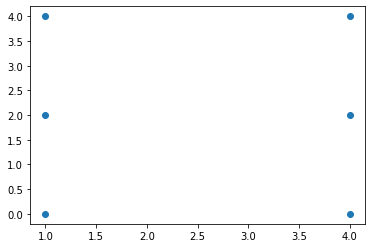

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

[1 0 1 0 0 1]
[[3.         3.33333333]
 [2.         0.66666667]]
[0 0]
['green' 'red' 'yellow']


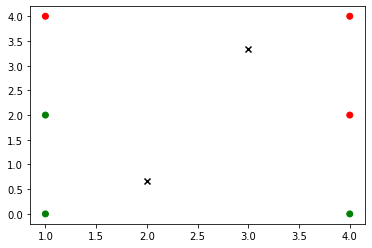

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict([[3,4],[7,2]]))

color_list = np.array(['red', 'green', 'blue', '#377eb8', '#4daf4a', 'yellow'])
print(color_list[[1,0,5]])

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

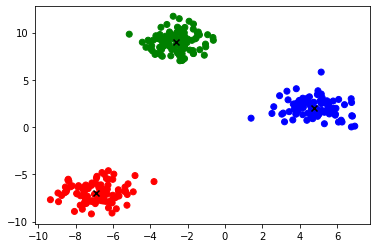

In [5]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, random_state=42)

#print(X)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

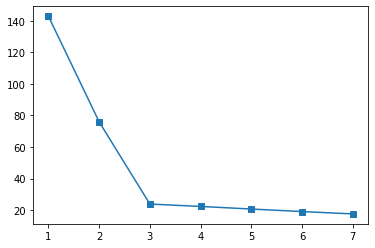

In [6]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1,8), inertia, marker='s')
plt.show()

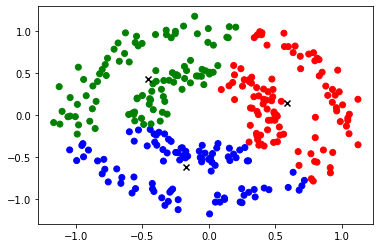

In [7]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=.5, noise=.08)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


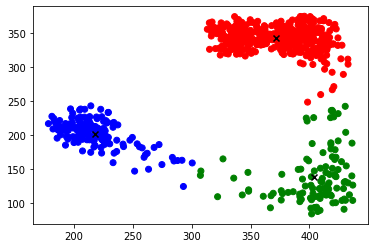

In [8]:
import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data, [coord], axis=0)
    
radius = 2
color = (0,0,255)
thickness = 0
    
bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption('dataGenerator')

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
    
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen, color, (int(point[0]),int(point[1])), radius, thickness)
    pygame.display.flip()
    
pygame.quit()

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

plt.figure()
plt.scatter(data[:,0], data[:,1], c=color_list[kmeans.labels_])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

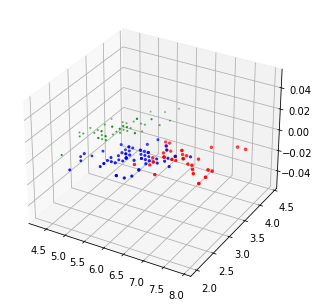

In [9]:
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

X = load_iris().data

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(X[:,0], X[:,1], X[:,2], c=color_list[kmeans.predict(X)])
plt.show()

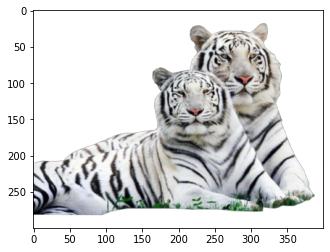

Shape:  (300, 400, 4)


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [16]:
from matplotlib.image import imread, imsave

def get_image(img_path, show=True):
    orig_img = imread(img_path)
    if show:
        plt.imshow(orig_img)
        plt.show()
        print('Shape: ', orig_img.shape)
    return orig_img

get_image("data/tiger.png")

In [17]:
def get_kmeans(orig_img, n_colors=8):
    X = orig_img.reshape((-1,4))
    kmeans = KMeans(n_clusters=n_colors).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return centroids[labels].reshape(orig_img.shape)

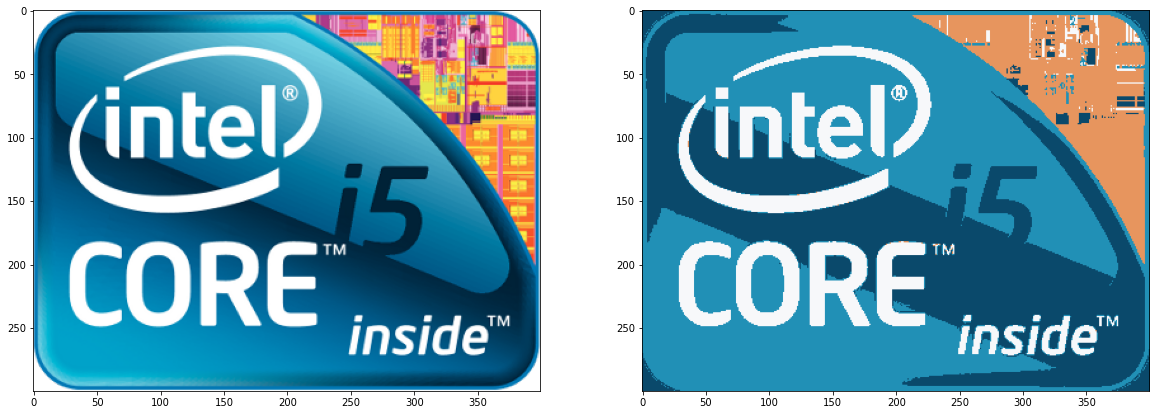

In [23]:
n_colors = 4
orig_img = get_image("data/logo.png", show=False)
new_img = get_kmeans(orig_img, n_colors)
fig, axarr = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])

class K_Means():
    def __init__(self, dataset, n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype='f')
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem, center) for center in self.centroids]
            # [2, 6, 9, 4] -> [...,0 ,...]
            self.labels = np.append(self.labels, [dist.index(min(dist))]).astype(int)
            
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k,label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    def fit(self):
        iter = 1
        while iter<self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i,j) for i,j in zip(self.centroids,prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
                

        
test = K_Means(X, 2)
print(test.centroids)
test.get_dist(X[0], X[5])

test.distribute_data()
print(test.labels)

test.recalculate_centroids()
print(test.centroids)

test.fit()
print(test.centroids)


color_list = np.array(['red', 'green', 'blue', '#377eb8', '#4daf4a', 'yellow'])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[test.labels])
plt.scatter(test.centroids[:,0], test.centroids[:,1], c='black', marker='x')
plt.show()

In [ ]:
import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data, [coord], axis=0)
    
radius = 2
color = (0,0,255)
thickness = 0
    
bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption('dataGenerator')

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
    
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen, color, (int(point[0]),int(point[1])), radius, thickness)
    pygame.display.flip()
    
pygame.quit()

test = K_Means(data, 3)
test.fit()

color_list = np.array(['red', 'green', 'blue', '#377eb8', '#4daf4a', 'yellow'])
plt.figure()
plt.scatter(data[:,0], data[:,1], c=color_list[test.labels])
plt.scatter(test.centroids[:,0], test.centroids[:,1], c='black', marker='x')
plt.show()